# Visualising data

With this large dataset we have gathered from the API, an approriate next step is to start to visualise the data. Properly considered research questions and approirate visualisations will help us to find the data we are looking for more efficiently, and will help us to understand the data we have gathered.

Note that the visualistions we are going to go through here are just starter examples of what can be achived, and to show how to use the tools demonstrated here. 

The first visualisations we are going to do are time-based, showing a simple and a more complex option. For these graphs, we are going to further restrict the data from the first 10 results gathered in the previous notebook - this will make the graphs easier to read and the code easier to follow. Later on in this noteobook, we will show how to make adjustments so the whole dataset is visible. 

To start, as always, we are going to install and import the required libraries. In this case, we are primaraly using MatPlotLib and Pandas. MatPlotLib is a powerful library for data visulaisation, and Pandas provides tools for working with dataframes (similar to Excel spreadsheets).

As before, we are also going to import pre-collected data. These data are the same as were collected in the last cell of the previous notebook, they've just been provided in the [additional data](aditional_data.py) file to allow users to start with this notebook, and reduce the risk of the API rejecting requests.

In [3]:
%pip install pandas
%pip install matplotlib
%pip install json
import pandas as pd
import matplotlib.pyplot as plt         # note that these two libraries are commonly imported as pd and plt, you are likely to see this in other people's code
import json

import aditional_data

ship_data_predownloaded = aditional_data.ship_record_data

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


The first thing we need to do is adjust the data to be more useful. In the real world, this will be entirely dependant on how your brain handles data, the data format required by the tools you are using, and the questions you are trying to answer. 

For this example, we are going to map our dictionary to a single dataframe (single spreadsheet), as this will be easier to work with, and in this case won't loose any data. 

In [4]:
ship_data_flat = []

for ship in ship_data_predownloaded:
    #print(ship)
    for record in ship["records"]:
        ship_data_flat.append(
            {
                "ship_name": ship["ship_name"],
                "id": record["id"],
                "startDate": record["startDate"],
                "endDate": record["endDate"],
                "digitised": record["digitised"],
                "description": record["description"],
            }
        )

ship_data_frame = pd.DataFrame(ship_data_flat)

print(ship_data_frame)

    ship_name        id   startDate     endDate  digitised  \
0      Acasta  C1496966  01/07/1920  31/08/1920      False   
1      Acasta  C1496941  01/12/1913  31/01/1914      False   
2      Acasta  C1496945  10/04/1915  31/05/1915      False   
3      Acasta  C1480965  01/04/1913  31/05/1913      False   
4      Acasta  C1480963  30/11/1912  30/01/1913      False   
..        ...       ...         ...         ...        ...   
124   Bedford  C2530407  30/08/1778  29/08/1780      False   
125   Bedford  C2530404  07/05/1723  05/03/1728      False   
126   Bedford  C2530416  04/11/1807  05/07/1815      False   
127   Bedford  C2530406  01/01/1757  31/12/1762      False   
128   Bedford  C2530402  01/01/1692  31/12/1797      False   

                                           description  
0           <scopecontent><p>ACASTA</p></scopecontent>  
1           <scopecontent><p>ACASTA</p></scopecontent>  
2           <scopecontent><p>ACASTA</p></scopecontent>  
3           <scopecontent><

To start, we are going to create a horizontally stacked bar chart, with time on the x-axis. This will let us plot the time period covered by each record. While this demonstration will only cover a few records, expanded, this style of visualisation could be used to give an easy overview of data, allowing the user to see if they've found the era they are looking for.

There are three phases of work we need to do: investigating the documentation, preparing the data, then plotting it. 

The first documentation for MatPlotLib [is avaiable here](https://matplotlib.org/stable/gallery/index), with further specific reference information about the diiferent tools [available via the reference link](https://matplotlib.org/stable/api/index.html). Note that for most examples, a link is provided from the general documentation to the specific reference section.

From the documentation for the [horizontal bar chart](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html) (and the [specific reference information](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barh.html)) we can see what data we need to provide. In this case: 
- The y coordinates 
- The width of the bars
- The height of the bars - remember that this is the width of the bars in a horizontal bar chart

We already have enough information for most of these categories, but we ne

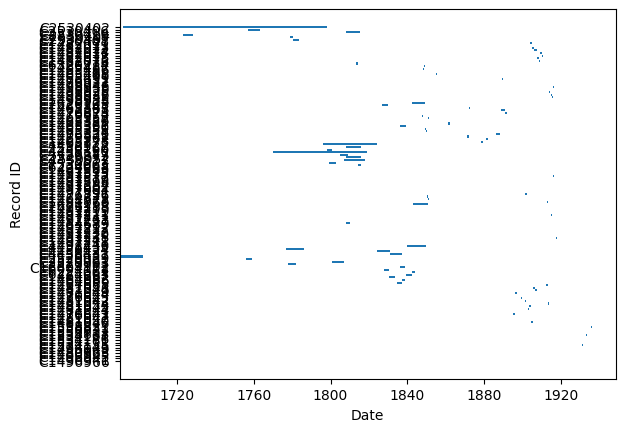

In [14]:
#ship_data_frame_first_10 = ship_data_frame.head(10)
ship_data_frame_first_10 = ship_data_frame

ship_data_frame_first_10["startDate"] = pd.to_datetime(ship_data_frame_first_10["startDate"], dayfirst=True)
ship_data_frame_first_10["endDate"] = pd.to_datetime(ship_data_frame_first_10["endDate"], dayfirst=True)
ship_data_frame_first_10["duration"] = ship_data_frame_first_10["endDate"] - ship_data_frame_first_10["startDate"]
#print(ship_data_frame_first_10["duration"])

fig, ax = plt.subplots()

#print(ship_data_frame_first_10)

ax.barh(ship_data_frame_first_10["id"], ship_data_frame_first_10["duration"], left=ship_data_frame_first_10["startDate"])

## add labels

ax.set_xlabel("Date")

ax.set_ylabel("Record ID")

plt.show()

This visualistion demonstrates how powerful visualisations can be - we can very quickly see the temporal spread of the data, and that some records cover a much wider time period than others. You can also start to see clusters of data around certain time periods, which could be records for specific ships (as they will have been active for a limited time period). 

However, there are improvements we can make. 
The first we are going to do is make the assumption that the user is going to be using this graph for to find records in a specific time period. For this, the user is still going to need as many records as possible, but also the labels on the y axis. To do this we are going to increase the size of the image. 

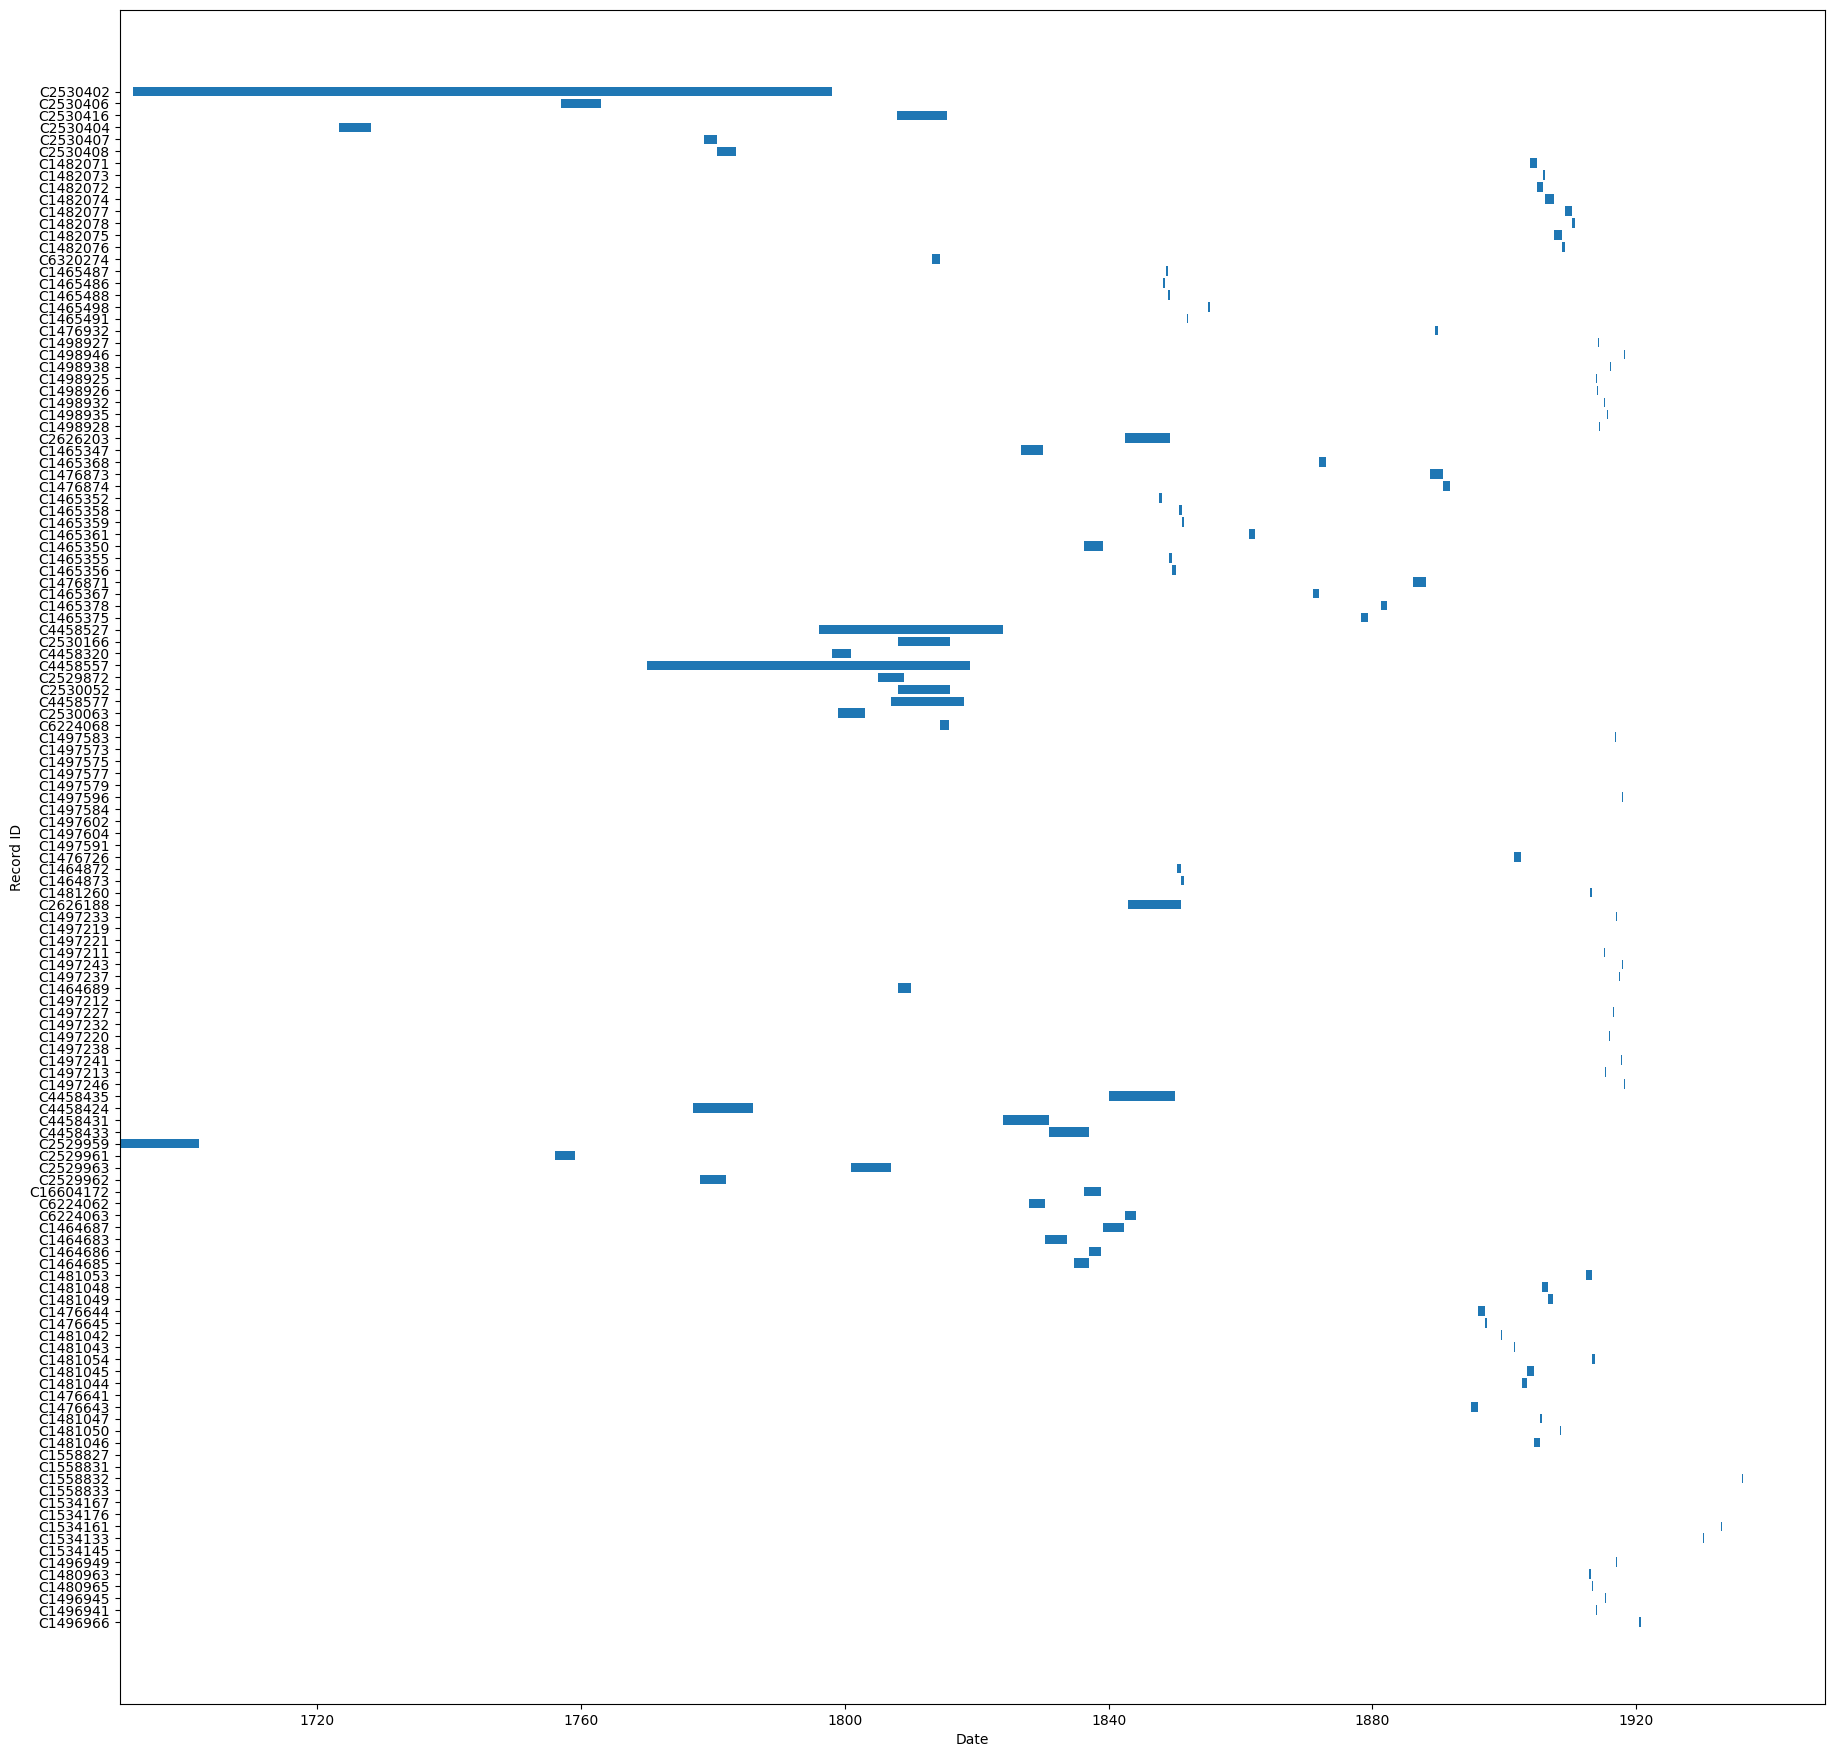

In [16]:
## re-draw the barh but at a much larger size

fig, ax = plt.subplots(figsize=(22, 22))

ax.barh(ship_data_frame_first_10["id"], ship_data_frame_first_10["duration"], left=ship_data_frame_first_10["startDate"])

## add labels

ax.set_xlabel("Date")

ax.set_ylabel("Record ID")

plt.show()

We can futher improve the visualisation by changing the colours of the bars. To make it easier to find correct ships, we are going to colour the bar based on ship name. So the viewer knows what ship they are looking for, we are going to add a legend. 

Finally, we are going to add a title to the graph.

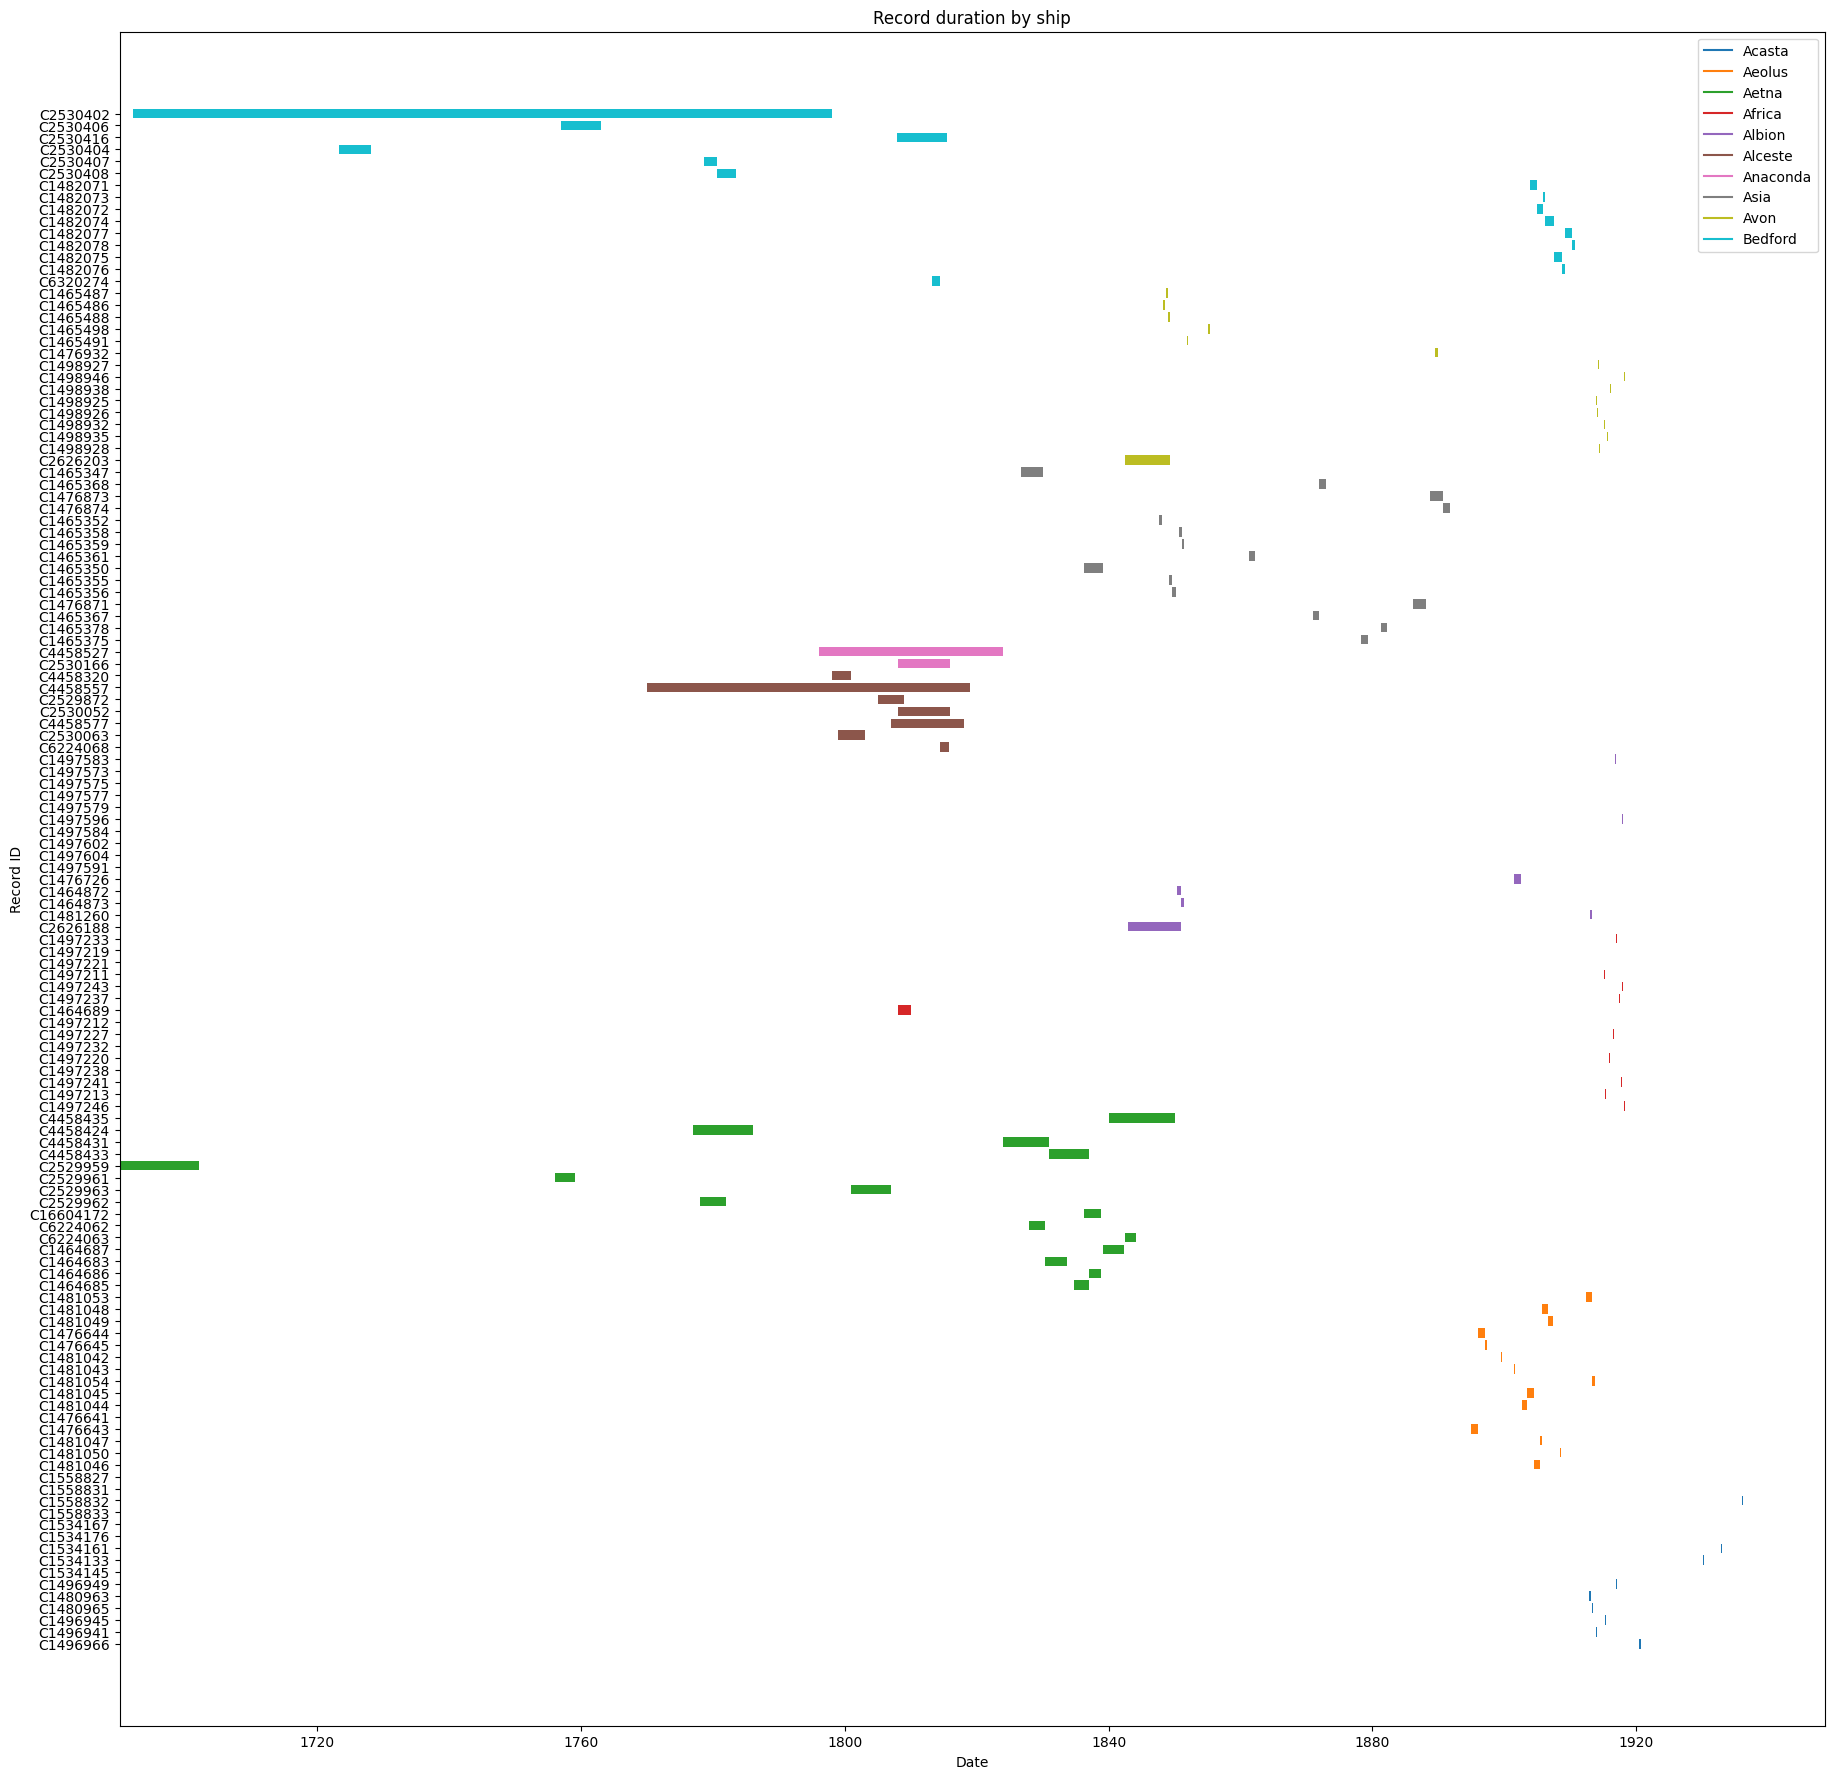

In [20]:
## Find all the unique ship names

unique_ship_names = ship_data_frame["ship_name"].unique()

## assign a colour to each ship name

ship_name_colour_map = {}

for index, ship_name in enumerate(unique_ship_names):
    ship_name_colour_map[ship_name] = f"C{index}"

##  add a new column to the dataframe that contains the colour for each ship

ship_data_frame["colour"] = ship_data_frame["ship_name"].map(ship_name_colour_map)

## re-draw the barh at the larger size, but this time colour each bar by ship name

fig, ax = plt.subplots(figsize=(22, 22))

ax.barh(ship_data_frame_first_10["id"], ship_data_frame_first_10["duration"], left=ship_data_frame_first_10["startDate"], color=ship_data_frame_first_10["colour"])

## add labels

ax.set_xlabel("Date")

ax.set_ylabel("Record ID")

## add a title

ax.set_title("Record duration by ship")

## add a legend showing the colour for each ship and the ship name

for ship_name, colour in ship_name_colour_map.items():
    ax.plot([], [], color=colour, label=ship_name)

ax.legend()

plt.show()
